In [3]:
import numpy as np
import timeit
import matplotlib.pyplot as plt

In [4]:
from main import Solver
from gurobi_solver import GurobiSolver
from pulp_solver import PulpSolver

In [5]:
def create_problems(N, num_problems, verbosity=True):
    """
    Create random problem instances.

    Parameters:
        N: int
            Size of the problem.
        num_problems: int
            Number of problem instances to create.
        verbosity: bool, optional
            Whether to print information during execution. Default is True.

    Returns:
        problems: list
            List of problem instances.
    """
    problems = []
    for i in range(num_problems):
        C = np.random.beta(1, 1, size=(N, N, N)) * 100  # Cost matrices are uniform in [0, 100]
        problems.append(C)

    if verbosity:
        print(f"Created {num_problems} problem instances for size {N}.")

        print("-"*10)

    return problems

def benchmark(N, num_problems, verbosity=True):
    """
    Benchmark different solvers.

    Parameters:
        N: int
            Size of the problem.
        num_problems: int
            Number of problem instances to create.
        verbosity: bool, optional
            Whether to print information during execution. Default is True.
    """
    solver_times = []
    gurobi_times = []
    pulp_times = []

    problems = create_problems(N, num_problems, verbosity=verbosity)

    fraction_below_threshold = 0

    if verbosity:
        print("Benchmarking Custom Solver:")
    for problem in problems:
        start_time = timeit.default_timer()
        dual_bounds, primal_bounds, _, _, _, fraction = solver.optimize(problem, learning_rate_scale, algorithm, beta, search_size, learning_rate, max_iterations, threshold)
        if verbosity:
            print(f"Objective Value: {primal_bounds[-1]:.2f}, Duality % Gap: {100 * fraction:.2f}%")
        elapsed_time = timeit.default_timer() - start_time

        solver_times.append(elapsed_time)

        if fraction < threshold:
            fraction_below_threshold += 1

        cumulative_solver_times = np.cumsum(solver_times)
        avg_time = np.mean(solver_times)
        percentage_below_threshold = (fraction_below_threshold / len(problems)) * 100
    if verbosity:
        print(f"Avg. execution time for Custom Solver: {avg_time:.4f} seconds")
        print(f"Percentage of time fraction < {threshold * 100:.2f}%: {percentage_below_threshold:.2f}%")
        print("-" * 10)

    if verbosity:
        print("Benchmarking Gurobi Solver:")
    for problem in problems:
        start_time = timeit.default_timer()
        primal = gurobi.optimize(problem)
        if verbosity:
            print(f"Objective Value: {primal:.2f}")
        elapsed_time = timeit.default_timer() - start_time

        gurobi_times.append(elapsed_time)

        cumulative_gurobi_times = np.cumsum(gurobi_times)
        avg_time = np.mean(gurobi_times)
    if verbosity:
        print(f"Avg. execution time for Gurobi Solver: {avg_time:.4f} seconds")
        print("-" * 10)

    if verbosity:
        print("Benchmarking PuLP Solver:")
    for problem in problems:
        start_time = timeit.default_timer()
        primal = pulp.optimize(problem)
        if verbosity:
            print(f"Objective Value: {primal:.2f}")
        elapsed_time = timeit.default_timer() - start_time

        pulp_times.append(elapsed_time)

        cumulative_pulp_times = np.cumsum(pulp_times)
        avg_time = np.mean(pulp_times)
    if verbosity:
        print(f"Avg. execution time for PuLP Solver: {avg_time:.4f} seconds")

    plt.figure(figsize=(8, 6))

    # Custom Solver
    plt.plot(np.arange(1, num_problems + 1), cumulative_solver_times, label="Custom Solver", marker='o', color='skyblue')

    # PuLP Solver
    plt.plot(np.arange(1, num_problems + 1), cumulative_pulp_times, label="PuLP Solver", marker='o', color='orange')

    # Gurobi Solver
    plt.plot(np.arange(1, num_problems + 1), cumulative_gurobi_times, label="Gurobi Solver", marker='o', color='green')

    plt.xlabel("Instance")
    plt.ylabel("Cumulative Execution Time (seconds)")
    plt.title(f"Cumulative Execution Time for Different Solvers (Problem Size: {N})")
    plt.legend()
    plt.show()

def compare(N, num_problems, verbosity=True):
    """
    Compare two custom solvers.

    Parameters:
        N: int
            Size of the problem.
        num_problems: int
            Number of problem instances to create.
        verbosity: bool, optional
            Whether to print information during execution. Default is True.
    """
    solver_times_1 = []
    solver_times_2 = []

    problems = create_problems(N, num_problems, verbosity=verbosity)

    fraction_below_threshold = 0

    if verbosity:
        print("Benchmarking Custom Solver 1:")
    for problem in problems:
        start_time = timeit.default_timer()
        dual_bounds, primal_bounds, _, _, _, fraction = solver.optimize(problem, learning_rate_scale_1, algorithm_1, beta_1, search_size_1, learning_rate_1, max_iterations_1, threshold_1)
        if verbosity:
            print(f"Objective Value: {primal_bounds[-1]:.2f}, Duality % Gap: {100 * fraction:.2f}%")
        elapsed_time = timeit.default_timer() - start_time

        solver_times_1.append(elapsed_time)

        if fraction < threshold_1:
            fraction_below_threshold += 1

        cumulative_solver_times_1 = np.cumsum(solver_times_1)
        avg_time = np.mean(solver_times_1)
        percentage_below_threshold = (fraction_below_threshold / len(problems)) * 100
    if verbosity:
        print(f"Avg. execution time for Custom Solver 1: {avg_time:.4f} seconds")
        print(f"Percentage of time fraction < {threshold * 100:.2f}%: {percentage_below_threshold:.2f}%")

    if verbosity:
        print("-" * 10)

    fraction_below_threshold = 0

    if verbosity:
        print("Benchmarking Custom Solver 2:")
    for problem in problems:
        start_time = timeit.default_timer()
        dual_bounds, primal_bounds, _, _, _, fraction = solver.optimize(problem, learning_rate_scale_2, algorithm_2, beta_2, search_size_2, learning_rate_2, max_iterations_2, threshold_2)
        if verbosity:
            print(f"Objective Value: {primal_bounds[-1]:.2f}, Duality % Gap: {100 * fraction:.2f}%")
        elapsed_time = timeit.default_timer() - start_time

        solver_times_2.append(elapsed_time)

        if fraction < threshold_2:
            fraction_below_threshold += 1

        cumulative_solver_times_2 = np.cumsum(solver_times_2)
        avg_time = np.mean(solver_times_2)
        percentage_below_threshold = (fraction_below_threshold / len(problems)) * 100
    if verbosity:
        print(f"Avg. execution time for Custom Solver 2: {avg_time:.4f} seconds")
        print(f"Percentage of time fraction < {threshold * 100:.2f}%: {percentage_below_threshold:.2f}%")

    plt.figure(figsize=(8, 6))

    # Custom Solver
    plt.plot(np.arange(1, num_problems + 1), cumulative_solver_times_1, label="Custom Solver 1", marker='o', color='skyblue')

    # PuLP Solver
    plt.plot(np.arange(1, num_problems + 1), cumulative_solver_times_2, label="Custom Solver 2", marker='o', color='orange')

    plt.xlabel("Instance")
    plt.ylabel("Cumulative Execution Time (seconds)")
    plt.title(f"Cumulative Execution Time for Different Solvers (Problem Size: {N})")
    plt.legend()
    plt.show()


In [6]:
address = '/Users/jetchung/gurobi.json'

In [7]:
solver = Solver()
gurobi = GurobiSolver(address)
pulp = PulpSolver()

Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 2471762
Academic license 2471762 - for non-commercial use only - registered to jo___@hertford.ox.ac.uk


### Parameters

In [8]:
learning_rate_scale="1/k" # options: constant, 1/k, 1/sqrt(k)
algorithm="nesterov" # options: nesterov, subgradient
beta=0.95
search_size=10
learning_rate=0.1
max_iterations=1000
threshold=0.05

In [9]:
N = 20

C = create_problems(N, 1)[0]

dual_bounds, primal_bounds, _, _, _, fraction = solver.optimize(C, learning_rate_scale, algorithm, beta, search_size, learning_rate, max_iterations, threshold)
optimal_value = gurobi.optimize(C)

Created 1 problem instances for size 20.
----------


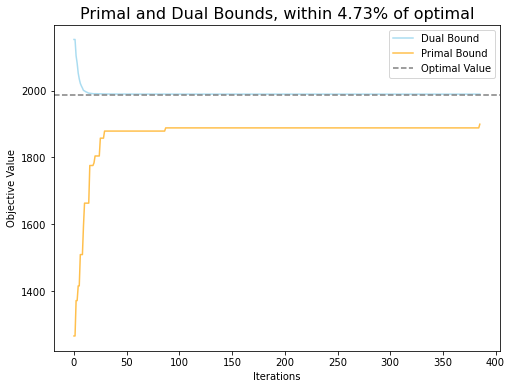

In [10]:
plt.figure(figsize=(8, 6))

plt.plot(dual_bounds, label='Dual Bound', color = "skyblue", alpha = 0.7)
plt.plot(primal_bounds, label = 'Primal Bound', color = "orange", alpha = 0.7)

plt.axhline(y=optimal_value, color='gray', linestyle='--', label='Optimal Value')

plt.xlabel('Iterations')
plt.ylabel('Objective Value')
plt.title(f"Primal and Dual Bounds, within {fraction * 100:.2f}% of optimal", fontsize = 16)
plt.legend()
plt.show()

# Benchmark against other commerical solvers

In [11]:
N = 35
num_problems = 5

learning_rate_scale="1/k"
algorithm="nesterov"
beta=0.95
search_size=10
learning_rate=0.1
max_iterations=1000
threshold=0.05


In [ ]:
benchmark(N, num_problems, True)

Created 5 problem instances for size 35.
----------
Benchmarking Custom Solver:
Objective Value: 3359.66, Duality % Gap: 3.98%
Objective Value: 3334.68, Duality % Gap: 4.76%
Objective Value: 3377.99, Duality % Gap: 3.44%
Objective Value: 3346.59, Duality % Gap: 4.41%
Objective Value: 3229.39, Duality % Gap: 8.20%
Avg. execution time for Custom Solver: 0.4742 seconds
Percentage of time fraction < 5.00%: 80.00%
----------
Benchmarking Gurobi Solver:
Objective Value: 3491.35
Objective Value: 3491.90
Objective Value: 3492.49
Objective Value: 3492.37
Objective Value: 3492.92
Avg. execution time for Gurobi Solver: 19.7722 seconds
----------
Benchmarking PuLP Solver:
Objective Value: 3491.35
Objective Value: 3491.97
Objective Value: 3492.59


# Comparison of Parameters

In [243]:
learning_rate_scale_1="1/k"
algorithm_1="nesterov"
beta_1=0.95
search_size_1=10
learning_rate_1=0.1
max_iterations_1=1000
threshold_1=0.05


learning_rate_scale_2="constant"
algorithm_2="subgradient"
beta_2=0
search_size_2=10
learning_rate_2=0.1
max_iterations_2=1000
threshold_2=0.05

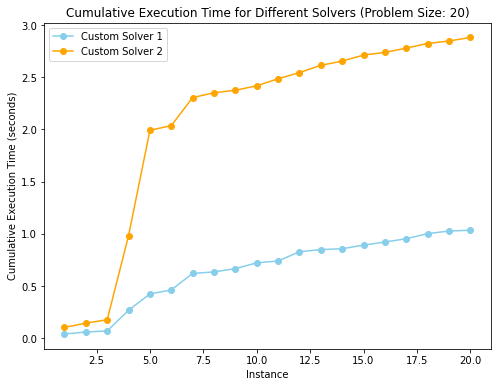

In [245]:
compare(20, 20, False)